# TIF360 Project

### Import packages

In [1]:
import os
import rdkit
from rdkit import Chem  # To extract information of the molecules
from rdkit.Chem import Draw  # To draw the molecules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Define function to read xyz files

In [2]:
def read_xyz(path):
    """
    Reads the xyz files in the directory on 'path'
    Input
    path: the path to the folder to be read
    
    Output
    atoms: list with the characters representing the atoms of a molecule
    coordinates: list with the cartesian coordinates of each atom
    smile: list with the SMILE representation of a molecule
    prop: list with the scalar properties
    """
    atoms = []
    coordinates = []

    with open(path, 'r') as file:
        lines = file.readlines()
        n_atoms = int(lines[0])  # the number of atoms
        smile = lines[n_atoms + 3].split()[0]  # smiles string
        prop = lines[1].split()[2:]  # scalar properties

        # to retrieve each atmos and its cartesian coordenates
        for atom in lines[2:n_atoms + 2]:
            line = atom.split()
            # which atom
            atoms.append(line[0])

            # its coordinate
            # Some properties have '*^' indicading exponentiation 
            try:
                coordinates.append(
                    (float(line[1]),
                     float(line[2]),
                     float(line[3]))
                    )
            except:
                coordinates.append(
                    (float(line[1].replace('*^', 'e')),
                     float(line[2].replace('*^', 'e')),
                     float(line[3].replace('*^', 'e')))
                    )
                    
    return atoms, coordinates, smile, prop

### Read xyz files

In [3]:
directory = '../data/dsgdb9nsd.xyz/'

# Reads the xyz files and return the properties, smiles and coordinates
data = []
smiles = []
properties = []
for file in os.listdir(directory):
    path = os.path.join(directory, file)
    atoms, coordinates, smile, prop = read_xyz(path)
    data.append((atoms, coordinates)) # A tuple with the atoms and its coordinates 
    smiles.append(smile) # The SMILES representation
    properties.append(prop) # The molecules properties

properties_names = ['A', 'B', 'C', 'mu', 'alfa', 'homo', 'lumo', 'gap', 'R²', 'zpve', 'U0', 'U', 'H', 'G', 'Cv']
df = pd.DataFrame(properties, columns = properties_names).astype('float32')
df['smiles'] = smiles
df.head()

,A,B,C,mu,alfa,homo,lumo,gap,R²,zpve,U0,U,H,G,Cv,smiles
0,157.711807,157.709976,157.706985,0.0000,13.210000,-0.3877,0.1171,0.5048,35.364101,0.044749,-40.478931,-40.476063,-40.475117,-40.498596,6.469,C
1,293.609741,293.541107,191.393967,1.6256,9.460000,-0.2570,0.0829,0.3399,26.156300,0.034358,-56.525887,-56.523026,-56.522083,-56.544960,6.316,N
2,799.588135,437.903870,282.945465,1.8511,6.310000,-0.2928,0.0687,0.3615,19.000200,0.021375,-76.404701,-76.401871,-76.400925,-76.422348,6.002,O
3,0.000000,35.610035,35.610035,0.0000,16.280001,-0.2845,0.0506,0.3351,59.524799,0.026841,-77.308426,-77.305527,-77.304581,-77.327431,8.574,C#C
4,0.000000,44.593884,44.593884,2.8937,12.990000,-0.3604,0.0191,0.3796,48.747601,0.016601,-93.411888,-93.409370,-93.408424,-93.431244,6.278,C#N


### Investigate how cordianets are specified

In [5]:
# Print cordinates of first molecule in data
print(data[0][1])

[(-0.0126981359, 1.0858041578, 0.0080009958), (0.002150416, -0.0060313176, 0.0019761204), (1.0117308433, 1.4637511618, 0.0002765748), (-0.540815069, 1.4475266138, -0.8766437152), (-0.5238136345, 1.4379326443, 0.9063972942)]


### Draw a few of the molecules

0


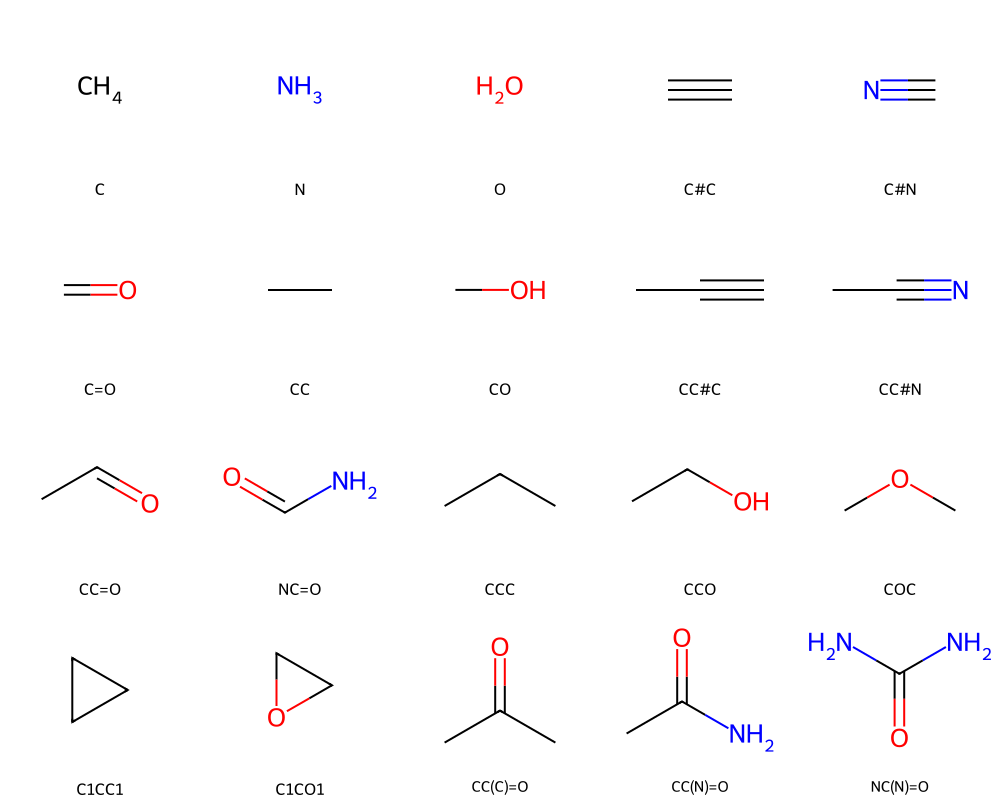

In [7]:
# Reading each molecule by its SMILES string
df['mol'] = df['smiles'].apply(lambda x: Chem.MolFromSmiles(x))

# Checking if there are None values
print("Number of NaNs: ", df['mol'].isnull().sum())

# Reads and prints the 20 first molecules
mol = df['mol'][:20]

Draw.MolsToGridImage(mol, molsPerRow=5, useSVG=True, legends=list(df['smiles'][:20].values))

### Add Hydrogens

In [9]:
df['mol'] = df['mol'].apply(lambda x: Chem.AddHs(x))

### Count the number of atoms and heavy atoms

In [11]:
df['num_of_atoms'] = df['mol'].apply(lambda x: x.GetNumAtoms())
df['num_of_heavy_atoms'] = df['mol'].apply(lambda x: x.GetNumHeavyAtoms())

df.head()

,A,B,C,mu,alfa,homo,lumo,gap,R²,zpve,U0,U,H,G,Cv,smiles,mol,num_of_atoms,num_of_heavy_atoms
0,157.711807,157.709976,157.706985,0.0000,13.210000,-0.3877,0.1171,0.5048,35.364101,0.044749,-40.478931,-40.476063,-40.475117,-40.498596,6.469,C,<rdkit.Chem.rdchem.Mol object at 0x0000023BD3C...,5,1
1,293.609741,293.541107,191.393967,1.6256,9.460000,-0.2570,0.0829,0.3399,26.156300,0.034358,-56.525887,-56.523026,-56.522083,-56.544960,6.316,N,<rdkit.Chem.rdchem.Mol object at 0x0000023C4D4...,4,1
2,799.588135,437.903870,282.945465,1.8511,6.310000,-0.2928,0.0687,0.3615,19.000200,0.021375,-76.404701,-76.401871,-76.400925,-76.422348,6.002,O,<rdkit.Chem.rdchem.Mol object at 0x0000023C4D4...,3,1
3,0.000000,35.610035,35.610035,0.0000,16.280001,-0.2845,0.0506,0.3351,59.524799,0.026841,-77.308426,-77.305527,-77.304581,-77.327431,8.574,C#C,<rdkit.Chem.rdchem.Mol object at 0x0000023C4D4...,4,2
4,0.000000,44.593884,44.593884,2.8937,12.990000,-0.3604,0.0191,0.3796,48.747601,0.016601,-93.411888,-93.409370,-93.408424,-93.431244,6.278,C#N,<rdkit.Chem.rdchem.Mol object at 0x0000023C4D4...,3,2
